# Exploratory  Data Analysis & Prediction of Nature of property ownership

**Business Objective**: To identify trends in the property taxes of baltimore city by exploring the dataset and predicting the kind of property ownership by their respective attributes. From the last several years we have seen a tremendous rise in the property exchanges and we are also paying the property tax bills for the charges levied according to state and locality. This project deals with analyzing historical data on property taxes and predicting the kind of ownership. This project assists government officials and other real estate exchange trusts i.e., who manage a wide range of properties to predict the kind of ownership of the property.

#### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Reading the datafile

In [2]:
df=pd.read_csv("Current_Tax_Sale_list.csv")

##### Displaing the top 5 rows of the datafarme

In [3]:
df.head()

,X,Y,address,ownership,land_use_c,total_lien,total_li_1,neighborho,when_sold,being_remo,...,ownername,tax_base,city_tax,state_tax,total_tax,total_3yea,years_elig,deed_date,council_di,objectid
0,1.412623e+06,595748.818596,1143 N FULTON AVE,H,R,1613.71,0.00,SANDTOWN-WINCHESTER,SOLD IN 4 YEARS,WILL BE SOLD,...,"CARSON, LYNETTA",30000,1348.80,67.20,1416.00,1613.71,10,2007/09/28 00:00:00+00,9,1
1,1.412695e+06,595473.921836,1720 RIGGS AVE,H,R,29687.35,28612.05,SANDTOWN-WINCHESTER,SOLD IN 4 YEARS,WILL BE SOLD,...,"EASLEY JR, ERNEST R",16200,1045.32,52.08,1097.40,1075.30,11,1986/05/02 00:00:00+00,9,2
2,1.412747e+06,595476.478590,1712 RIGGS AVE,N,R,22180.70,22070.48,SANDTOWN-WINCHESTER,SOLD IN 4 YEARS,WILL BE SOLD,...,"N-1, INC.",1000,67.44,3.36,70.80,110.22,11,1998/05/01 00:00:00+00,9,3
3,1.412760e+06,595477.113759,1710 RIGGS AVE,N,R,88346.63,88236.41,SANDTOWN-WINCHESTER,SOLD IN 4 YEARS,WILL BE SOLD,...,"BARRACK, RICHARD S",1000,67.44,3.36,70.80,110.22,11,1952/01/31 00:00:00+00,9,4
4,1.412999e+06,596122.780447,1625 LAURENS ST,N,R,335.20,30.00,SANDTOWN-WINCHESTER,NEVER SOLD,WILL BE SOLD,...,"BLY, CORY",30000,555.26,27.66,582.92,305.20,3,2017/10/10 00:00:00+00,9,5


##### Listing out all the columns in the dataframe

In [4]:
df.columns

Index(['X', 'Y', 'address', 'ownership', 'land_use_c', 'total_lien',
       'total_li_1', 'neighborho', 'when_sold', 'being_remo', 'block', 'lot',
       'pin', 'soldto', 'ownername', 'tax_base', 'city_tax', 'state_tax',
       'total_tax', 'total_3yea', 'years_elig', 'deed_date', 'council_di',
       'objectid'],
      dtype='object')

X: Longitude coordinate

Y: Latitude coordinate

address: Address of the property located
 
ownership: Indicator for type of ownership on property. H : Owner occupied principal residence, D : Dual use, N: Not owner occupied

land_use_c: The land use code of  the property. R : residential, C : commercial, I : Industrial

total_lien: The total amount of liens on the property.

neighbourho: The neighborhood where the property is located.

when_sold: Category of the property sold type

block: The block number for the property.

lot: The lot number for the property.

pin: Zip code of the property located

soldto: Name of the buying party to whom the property is sold 

ownername:The name of the owner of the property.

tax_base: The value of the property.

city_tax: The annual city property tax based on the assesed value of the property.

state_tax: The annual state property tax based on the assesed value of the property.

total_tax: The sum of the "City Tax" and "State Tax" columns.

total_3yea: Total tax paid for 3 years.

years_elig: The number of years the property has been eligible for tax sale in the past.

deed_date: The date that ownership of the property was transferred to the owner.

council_di: The city council district where the property is located.

objectid: The object id of the property.

In [5]:
#printing shape of the dataframe
print(df.shape)
print("Number of rows in the dataframe:", df.shape[0])
print("Number of columns in the dataframe:", df.shape[1])

(11570, 24)
Number of rows in the dataframe: 11570
Number of columns in the dataframe: 24


In [6]:
#Displaying column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11570 entries, 0 to 11569
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X           11546 non-null  float64
 1   Y           11546 non-null  float64
 2   address     10874 non-null  object 
 3   ownership   11570 non-null  object 
 4   land_use_c  11570 non-null  object 
 5   total_lien  11570 non-null  float64
 6   total_li_1  11570 non-null  float64
 7   neighborho  11570 non-null  object 
 8   when_sold   11570 non-null  object 
 9   being_remo  11570 non-null  object 
 10  block       11570 non-null  object 
 11  lot         11570 non-null  object 
 12  pin         11570 non-null  object 
 13  soldto      11570 non-null  object 
 14  ownername   11570 non-null  object 
 15  tax_base    11570 non-null  int64  
 16  city_tax    11570 non-null  float64
 17  state_tax   11570 non-null  float64
 18  total_tax   11570 non-null  float64
 19  total_3yea  11570 non-nul

In [7]:
#Displaying the data types of the columns
df.dtypes

X             float64
Y             float64
address        object
ownership      object
land_use_c     object
total_lien    float64
total_li_1    float64
neighborho     object
when_sold      object
being_remo     object
block          object
lot            object
pin            object
soldto         object
ownername      object
tax_base        int64
city_tax      float64
state_tax     float64
total_tax     float64
total_3yea    float64
years_elig      int64
deed_date      object
council_di      int64
objectid        int64
dtype: object

### Explorative Data Analysis

In [8]:
#Displaying summary of numerical columns
df.describe()

,X,Y,total_lien,total_li_1,tax_base,city_tax,state_tax,total_tax,total_3yea,years_elig,council_di,objectid
count,1.154600e+04,11546.000000,1.157000e+04,1.157000e+04,1.157000e+04,11570.000000,11570.000000,11570.000000,11570.000000,11570.000000,11570.000000,11570.000000
mean,1.417335e+06,596911.736952,3.702790e+04,3.536629e+04,1.129286e+05,1846.291077,91.985916,1938.276993,1661.615822,8.543129,8.668194,5785.500000
std,1.127749e+04,9266.271701,9.112115e+04,9.098396e+04,8.843382e+05,5929.764357,295.433132,6225.197489,4899.053177,3.019844,3.365319,3340.115642
min,1.394040e+06,560818.302828,2.542300e+02,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,1.408874e+06,590915.450310,1.054140e+03,2.581000e+01,7.000000e+03,161.850000,8.070000,169.920000,110.220000,7.000000,7.000000,2893.250000
50%,1.414410e+06,596774.290791,2.611130e+03,5.866900e+02,2.818350e+04,674.400000,33.600000,708.000000,668.980000,10.000000,9.000000,5785.500000
75%,1.427130e+06,601581.473106,2.130543e+04,1.898682e+04,8.823300e+04,1985.727500,98.930000,2084.660000,1921.820000,11.000000,12.000000,8677.750000
max,1.445413e+06,621232.026488,1.570473e+06,1.559891e+06,3.927680e+07,245735.620000,12243.060000,257978.680000,311495.640000,11.000000,14.000000,11570.000000


> Inferences: 
    We can see that the basic staticstics of all the numerical columns are displayed. The highest city tax is 245735.62 and the highest state tax is 12243. 25% of the city tax values falls under 161.8 and 50% of the values are under 674.4  

In [9]:
#Displaying the description of all columns
df.describe(include = 'all')

,X,Y,address,ownership,land_use_c,total_lien,total_li_1,neighborho,when_sold,being_remo,...,ownername,tax_base,city_tax,state_tax,total_tax,total_3yea,years_elig,deed_date,council_di,objectid
count,1.154600e+04,11546.000000,10874,11570,11570,1.157000e+04,1.157000e+04,11570,11570,11570,...,11570,1.157000e+04,11570.000000,11570.000000,11570.000000,11570.000000,11570.000000,11153,11570.000000,11570.000000
unique,NaN,NaN,10874,3,9,NaN,NaN,252,3,2,...,9828,NaN,NaN,NaN,NaN,NaN,NaN,5867,NaN,NaN
top,NaN,NaN,1700 W FAYETTE ST,N,R,NaN,NaN,BROADWAY EAST,SOLD IN 4 YEARS,WILL BE SOLD,...,"HAVEN ROCK, LLC",NaN,NaN,NaN,NaN,NaN,NaN,2019/01/18 00:00:00+00,NaN,NaN
freq,NaN,NaN,1,9892,10318,NaN,NaN,509,7049,10597,...,71,NaN,NaN,NaN,NaN,NaN,NaN,79,NaN,NaN
mean,1.417335e+06,596911.736952,NaN,NaN,NaN,3.702790e+04,3.536629e+04,NaN,NaN,NaN,...,NaN,1.129286e+05,1846.291077,91.985916,1938.276993,1661.615822,8.543129,NaN,8.668194,5785.500000
std,1.127749e+04,9266.271701,NaN,NaN,NaN,9.112115e+04,9.098396e+04,NaN,NaN,NaN,...,NaN,8.843382e+05,5929.764357,295.433132,6225.197489,4899.053177,3.019844,NaN,3.365319,3340.115642
min,1.394040e+06,560818.302828,NaN,NaN,NaN,2.542300e+02,0.000000e+00,NaN,NaN,NaN,...,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,0.000000,1.000000
25%,1.408874e+06,590915.450310,NaN,NaN,NaN,1.054140e+03,2.581000e+01,NaN,NaN,NaN,...,NaN,7.000000e+03,161.850000,8.070000,169.920000,110.220000,7.000000,NaN,7.000000,2893.250000
50%,1.414410e+06,596774.290791,NaN,NaN,NaN,2.611130e+03,5.866900e+02,NaN,NaN,NaN,...,NaN,2.818350e+04,674.400000,33.600000,708.000000,668.980000,10.000000,NaN,9.000000,5785.500000
75%,1.427130e+06,601581.473106,NaN,NaN,NaN,2.130543e+04,1.898682e+04,NaN,NaN,NaN,...,NaN,8.823300e+04,1985.727500,98.930000,2084.660000,1921.820000,11.000000,NaN,12.000000,8677.750000


> Inferences: We can see that the basic staticstics of all the numerical columns are displayed. 

##### Plotting the bar graph to display the missing values in each column

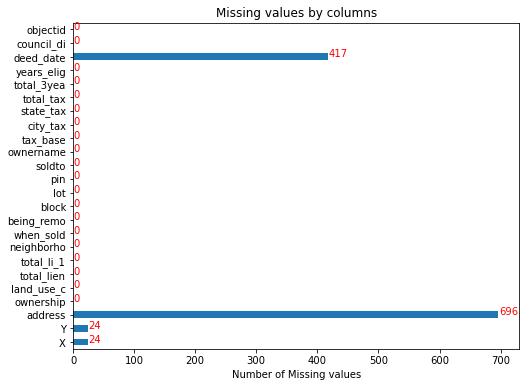

In [10]:
#Displaying the missing values in each column
plt.rcParams["figure.figsize"] = (8,6)
df.isnull().sum().plot.barh()
plt.xlabel('Number of Missing values')
plt.title("Missing values by columns")
for i, v in enumerate(df.isnull().sum()):
    plt.text(v +1, i , str(v), color='red')

> Inferences:

    We can see that the deed date column has 417 missing values, address has 696 missing values, and X & Y coordinates has 24 missing values each

##### Conversion of columns to appropriate data types

In [11]:
#Converting columns to appropriate datatypes
df['deed_date']=pd.to_datetime(df['deed_date'])
df['ownership']=df['ownership'].astype('category')
df['when_sold']=df['when_sold'].astype('category')
df['being_remo']=df['being_remo'].astype('category')
df['land_use_c']=df['land_use_c'].astype('category')

In [12]:
df.head()

,X,Y,address,ownership,land_use_c,total_lien,total_li_1,neighborho,when_sold,being_remo,...,ownername,tax_base,city_tax,state_tax,total_tax,total_3yea,years_elig,deed_date,council_di,objectid
0,1.412623e+06,595748.818596,1143 N FULTON AVE,H,R,1613.71,0.00,SANDTOWN-WINCHESTER,SOLD IN 4 YEARS,WILL BE SOLD,...,"CARSON, LYNETTA",30000,1348.80,67.20,1416.00,1613.71,10,2007-09-28 00:00:00+00:00,9,1
1,1.412695e+06,595473.921836,1720 RIGGS AVE,H,R,29687.35,28612.05,SANDTOWN-WINCHESTER,SOLD IN 4 YEARS,WILL BE SOLD,...,"EASLEY JR, ERNEST R",16200,1045.32,52.08,1097.40,1075.30,11,1986-05-02 00:00:00+00:00,9,2
2,1.412747e+06,595476.478590,1712 RIGGS AVE,N,R,22180.70,22070.48,SANDTOWN-WINCHESTER,SOLD IN 4 YEARS,WILL BE SOLD,...,"N-1, INC.",1000,67.44,3.36,70.80,110.22,11,1998-05-01 00:00:00+00:00,9,3
3,1.412760e+06,595477.113759,1710 RIGGS AVE,N,R,88346.63,88236.41,SANDTOWN-WINCHESTER,SOLD IN 4 YEARS,WILL BE SOLD,...,"BARRACK, RICHARD S",1000,67.44,3.36,70.80,110.22,11,1952-01-31 00:00:00+00:00,9,4
4,1.412999e+06,596122.780447,1625 LAURENS ST,N,R,335.20,30.00,SANDTOWN-WINCHESTER,NEVER SOLD,WILL BE SOLD,...,"BLY, CORY",30000,555.26,27.66,582.92,305.20,3,2017-10-10 00:00:00+00:00,9,5


##### DIsplaying the count of unique values in the dataframe with respect to column

In [13]:
df.nunique()

X             11413
Y             11415
address       10874
ownership         3
land_use_c        9
total_lien    10026
total_li_1     6352
neighborho      252
when_sold         3
being_remo        2
block          3132
lot             644
pin           11570
soldto            3
ownername      9828
tax_base       3261
city_tax       3368
state_tax      3361
total_tax      3205
total_3yea     4966
years_elig       11
deed_date      5867
council_di       15
objectid      11570
dtype: int64

##### Plotting the bar garph for ownership indicator and its indicator counts

<AxesSubplot:>

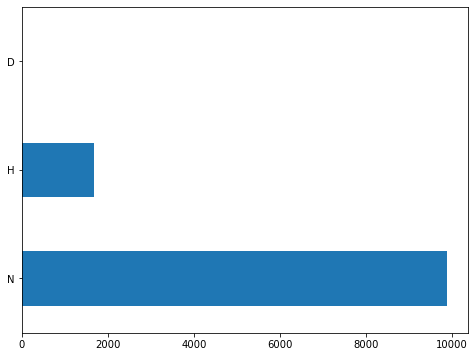

In [14]:
df['ownership'].value_counts().plot(kind='barh')

> Inferences:
    
    We can see that the indicator N has close to 9500 values nad indicator H has close to 2000 values

##### Dipalying the bar graph for counts of land use indicators

<AxesSubplot:>

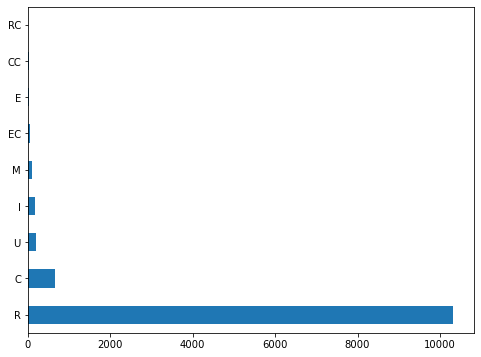

In [15]:
df['land_use_c'].value_counts().plot(kind='barh')

> Inferences:

    The indicator R has close to 10200 values and C has close to 600 values

##### Displaying the value counts of being removed column

In [16]:
df['being_remo'].value_counts()

WILL BE SOLD                     10597
FLAGGED FOR REMOVAL FROM SALE      973
Name: being_remo, dtype: int64

> Inferences:
    
    We can see that the 10597 properties are flagged as WILL BE SOLD and 973 properties are falgged as FLAGGED FOR REMOVAL FROM SALE 

##### Displaying the counts of deed dates with repect to the months in a year

Text(0.5, 0, 'Month')

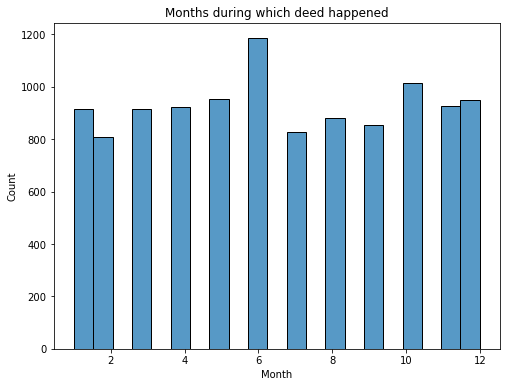

In [17]:
sns.histplot(df['deed_date'].dt.month)
plt.title('Months during which deed happened')
plt.xlabel('Month')

> Inferences:

    We can see that most of the deeds happen in the month of June and followed by october and least in February

##### Displaying the counts of deed dates with repect to the deed year

Text(0.5, 0, 'Deed Year')

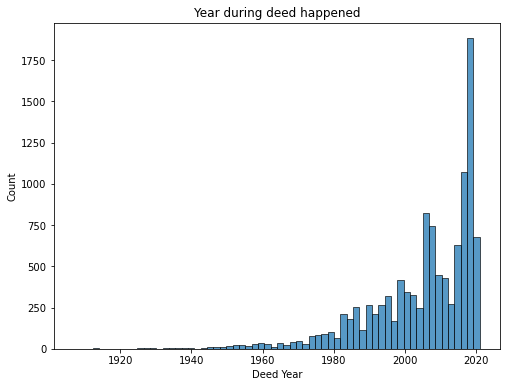

In [18]:
sns.histplot(df['deed_date'].dt.year)
plt.title("Year during deed happened")
plt.xlabel('Deed Year')

> Inferences:
    
    We can see that the most of the deeds are happening after 2000 and 2019 has the most deeds taken place. Deeds in 2002 are relatively lower than the deeds in 2018.

##### Plotting the distribution graphs for base taxes of the properties

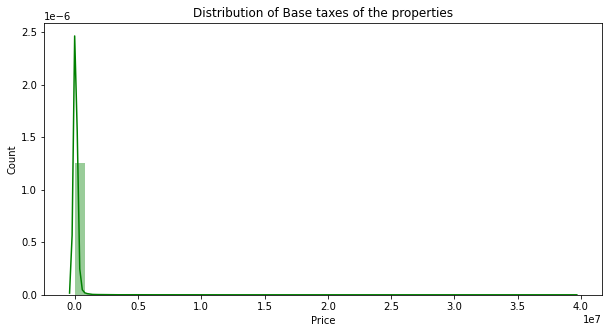

In [19]:
#Distribution of Base taxes of the properties
plt.figure(figsize=(10,5))
(sns.distplot(df['tax_base'],bins=50,kde=True,color = "green")).set(xlabel="Price", ylabel = "Count", title='Distribution of Base taxes of the properties')
plt.show()

> Inferences:
    
    We can see that the distribution doesn't follow normal distribution and most of the values are under 1500000

##### Plotting the distribution graphs for total tax of the properties

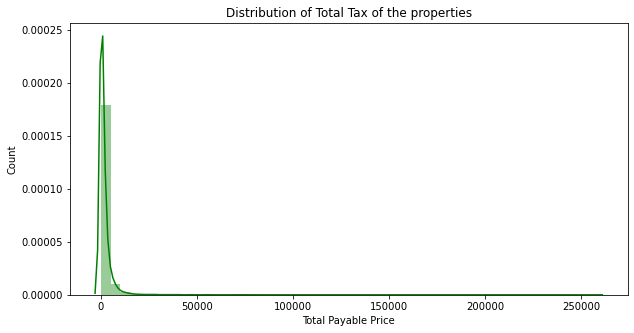

In [20]:
#Distribution of total tax of the properties
plt.figure(figsize=(10,5))
(sns.distplot(df['total_tax'],bins=50,kde=True,color = "green")).set(xlabel="Total Payable Price", ylabel = "Count", title='Distribution of Total Tax of the properties')
plt.show()

> Inferences: 
    
    We can see that the total tax of the properties are under 20000

##### Plotting the distribution graphs for number of years a property eligible for tax

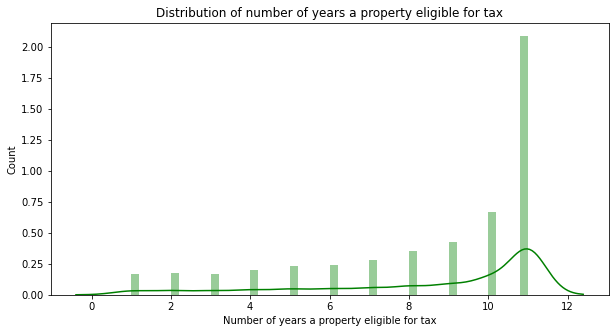

In [21]:
plt.figure(figsize=(10,5))
(sns.distplot(df['years_elig'],bins=50,kde=True,color = "green")).set(xlabel="Number of years a property eligible for tax", ylabel = "Count", title='Distribution of number of years a property eligible for tax')
plt.show()

> Inferences:
    
    We can see that the most of the properties are eligible for 11 years for taxing

##### Plotting the graph of tatal tax paid with respect to the council ID

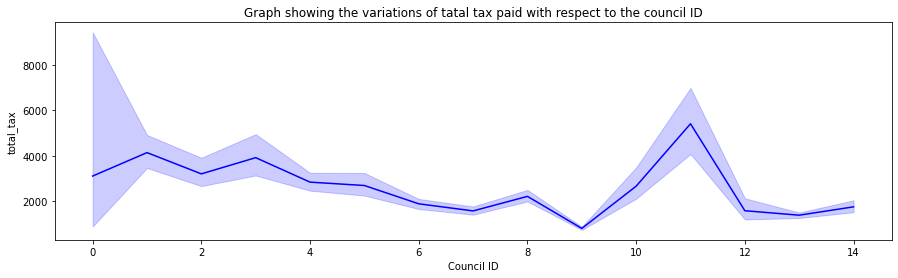

In [22]:
#visualization of total tax paid with respect to the council ID
plt.figure(figsize=(15,4))
sns.lineplot(x='council_di',y='total_tax', data =df, color = 'b')
plt.title("Graph showing the variations of tatal tax paid with respect to the council ID")
plt.xlabel("Council ID")
plt.show()

##### Plotting the graph of total tax paid with respect to the years eligible

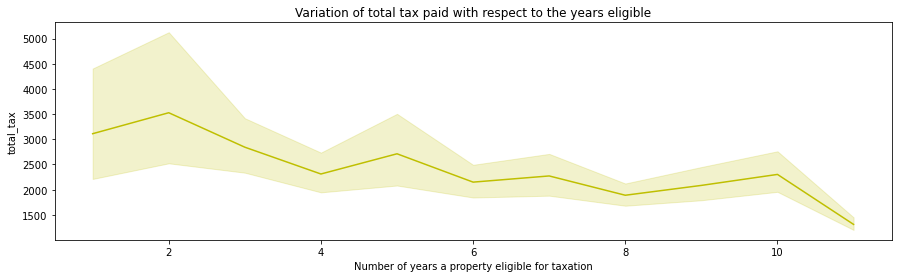

In [23]:
#visualization of total tax paid with respect to the years eligible
plt.figure(figsize=(15,4))
sns.lineplot(x='years_elig',y='total_tax', data =df, color = 'y')
plt.title('Variation of total tax paid with respect to the years eligible')
plt.xlabel("Number of years a property eligible for taxation")
plt.show()

> Inferences:
    
    We can see that the properties paid highest tax which is eligible for taxation duration of 2 years

##### Plotting the graph that compares the total taxes paid with the type of ownership indicator

<AxesSubplot:title={'center':'Graph showing the comparision of total tax paid according to the indiactor type'}, xlabel='ownership', ylabel='total_tax'>

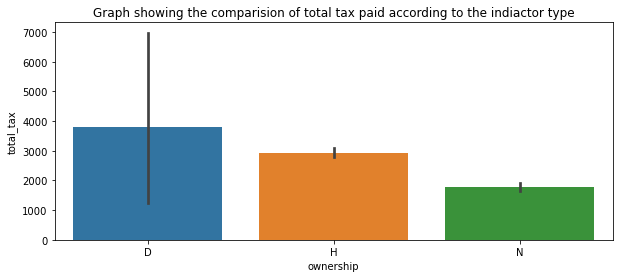

In [24]:
#comparing the total taxes paid with the type of ownership indicator
plt.figure(figsize=(10,4))
plt.title("Graph showing the comparision of total tax paid according to the indiactor type")
plt.xlabel("Ownership Indiactor")
sns.barplot(df['ownership'],df['total_tax'])

> Infrences:
    
    The properties with indicator D has paid the total highest taxes then followed by properties with H indicator 

##### Plotting the graph that compares the total taxes paid with the type of land_use indicator

Text(0.5, 0, 'Land Use Indiactaor')

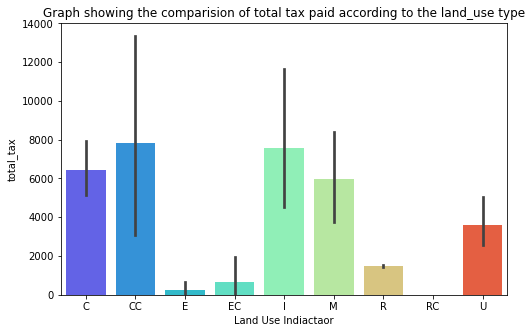

In [25]:
#comparing the total taxes paid with the type of land_use indicator
plt.figure(figsize=(8,5))
sns.barplot(x='land_use_c',y='total_tax',data=df, palette='rainbow')
plt.title("Graph showing the comparision of total tax paid according to the land_use type")
plt.xlabel("Land Use Indiactaor")

> Inferences: 
    
    The properties with land use CC as indiactor has paid te highest total taxes and the properties with indicator I has paid the next highest total taxes

 ##### Plotting the graph that compares the total taxes paid with the type of ownership and when sold flag

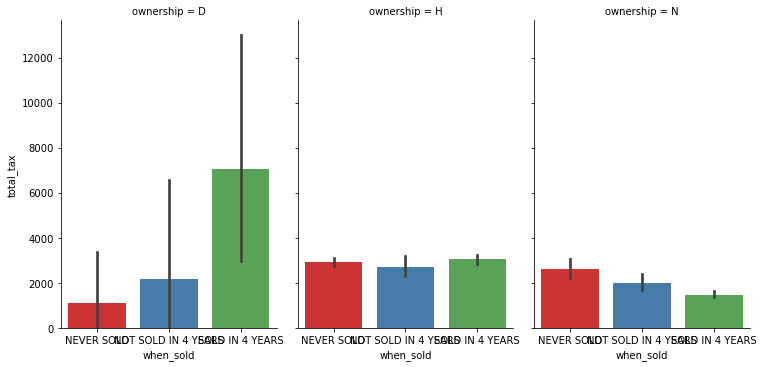

In [26]:
#comparing the total taxes paid with the type of ownership and when sold flag
#plt.title("#comparing the total taxes paid with the type of ownership and when sold flag")
sns.catplot(x='when_sold',y='total_tax', col = 'ownership', data=df,
                kind='bar', aspect=.7, palette='Set1')


> Inferences:
    
    It can be infered that the properties that have labelled as sold in 4 years has paid the highest total tax with properties of 'D' indicator
    
    The properties with lable "Never sold" has paid the highest tax within the properties falgged as 'N' as their ownership indicator

### Feature Engineering & Feature Selection 

##### Displaying the total null values in the primary dataframe

In [27]:
df.isnull().sum()

X              24
Y              24
address       696
ownership       0
land_use_c      0
total_lien      0
total_li_1      0
neighborho      0
when_sold       0
being_remo      0
block           0
lot             0
pin             0
soldto          0
ownername       0
tax_base        0
city_tax        0
state_tax       0
total_tax       0
total_3yea      0
years_elig      0
deed_date     417
council_di      0
objectid        0
dtype: int64

In [28]:
#Calculating percent of missing values for deed_date
df['deed_date'].isnull().sum()/len(df)

0.03604148660328436

In [29]:
#Calculating percent of missing values for address
df['address'].isnull().sum()/len(df)

0.06015557476231634

In [30]:
#Calculating percent of missing values for X & Y-Coordinates
print("Percent of missing values for X-Coordinate:",df['X'].isnull().sum()/len(df))
print("Percent of missing values for Y-Coordinate:",df['Y'].isnull().sum()/len(df))

Percent of missing values for X-Coordinate: 0.002074330164217805
Percent of missing values for Y-Coordinate: 0.002074330164217805


> Inferences:
    
    As we can see that the percentage of missing values is lower for all four columns, we can impute the missing columns rather than dropping them in our further analysis
    
    Preferably, it is viable to drop a column with has more than 30% of the missing values.

In [31]:
#Taking the columns that are used for further analysis and modelling as a new dataframe df1

df1=df[['ownership','land_use_c','total_lien','total_li_1','when_sold','being_remo','tax_base','city_tax','state_tax','total_tax','total_3yea','years_elig','council_di']]

##### Displaying the first 5 rows of the new dataframe

In [32]:
df1.head()

,ownership,land_use_c,total_lien,total_li_1,when_sold,being_remo,tax_base,city_tax,state_tax,total_tax,total_3yea,years_elig,council_di
0,H,R,1613.71,0.00,SOLD IN 4 YEARS,WILL BE SOLD,30000,1348.80,67.20,1416.00,1613.71,10,9
1,H,R,29687.35,28612.05,SOLD IN 4 YEARS,WILL BE SOLD,16200,1045.32,52.08,1097.40,1075.30,11,9
2,N,R,22180.70,22070.48,SOLD IN 4 YEARS,WILL BE SOLD,1000,67.44,3.36,70.80,110.22,11,9
3,N,R,88346.63,88236.41,SOLD IN 4 YEARS,WILL BE SOLD,1000,67.44,3.36,70.80,110.22,11,9
4,N,R,335.20,30.00,NEVER SOLD,WILL BE SOLD,30000,555.26,27.66,582.92,305.20,3,9


##### Checking whether the columns has appropriate data types

In [33]:
df1.dtypes

ownership     category
land_use_c    category
total_lien     float64
total_li_1     float64
when_sold     category
being_remo    category
tax_base         int64
city_tax       float64
state_tax      float64
total_tax      float64
total_3yea     float64
years_elig       int64
council_di       int64
dtype: object

##### Checking the null values to treat null values if any

In [34]:
df1.isnull().sum()

ownership     0
land_use_c    0
total_lien    0
total_li_1    0
when_sold     0
being_remo    0
tax_base      0
city_tax      0
state_tax     0
total_tax     0
total_3yea    0
years_elig    0
council_di    0
dtype: int64

> Inferences:

    The columns with numerical types can be imputed with mean or mode depending on the business problem and landscape and 
    the categorical columns can be imputed with most frequent value 

<AxesSubplot:xlabel='tax_base'>

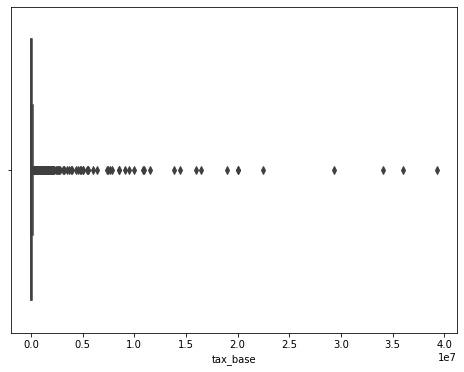

In [35]:
#Checking for outliers in tax_base column
sns.boxplot(x=df1['tax_base'])

> Inferences:
    
    We can see that there are few outliers present in the tax_base column 

<AxesSubplot:xlabel='total_tax'>

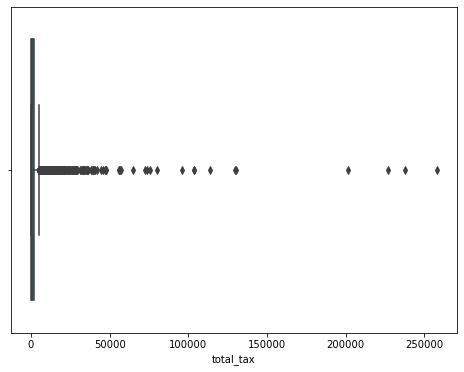

In [36]:
#Checking for outliers in total_tax column
sns.boxplot(x=df1['total_tax'])

> Inferences:
    
    We can also see that there are outliers present in total_tax column

In [37]:
#taking all the numerical columns to a list for treating the outliers
list_col=['total_lien','total_li_1','tax_base','city_tax','state_tax','total_tax','total_3yea']

##### Determining Z-scores to treat outliers in numerical columns  

In [38]:
#We use Z-score to describe the data point for determining the realtionship with standard deviation and the mean of the other datapoints
from scipy import stats
z=np.abs(stats.zscore(df1[list_col]))

In [39]:
#printing Z-scores
print(z)

[[3.88666337e-01 3.88725816e-01 9.37788255e-02 ... 8.39004995e-02
  8.39008828e-02 9.77901048e-03]
 [8.05616359e-02 7.42386616e-02 1.09384390e-01 ... 1.35081805e-01
  1.35082194e-01 1.19684588e-01]
 [1.62946184e-01 1.46139827e-01 1.26573129e-01 ... 2.99999346e-01
  2.99999752e-01 3.16686269e-01]
 ...
 [4.03115089e-01 3.85589303e-01 1.27703967e-01 ... 3.11372969e-01
  3.11373376e-01 3.36772650e-01]
 [3.88357284e-01 3.88725816e-01 7.28583218e-02 ... 1.27499390e-01
  1.27499777e-01 4.03071259e-03]
 [3.96560565e-01 3.79024896e-01 8.24072367e+00 ... 3.11372969e-01
  3.11373376e-01 3.36772650e-01]]


In [40]:
tresh_z_score=3
#Creating another datframe after removing the outliers in the previous dataframe
df2=df1[(z<tresh_z_score).all(axis=1)]

> Inferences:
    
    The Z-score greater than 3 is considered as an outlier, because in normal distribution  99.7% of the values are in the range of +3 or -3 of the standard deviation 
    

In [41]:
print("The shape of the old dataframe is:",df1.shape)
print("The shape of the new dataframe is:",df2.shape)

The shape of the old dataframe is: (11570, 13)
The shape of the new dataframe is: (11164, 13)


> Inferences:

    We can see clearly that the outliers has been removed from the dataframe

##### Priniting the first 5 rows after removing the outliers

In [42]:
df2.head()

,ownership,land_use_c,total_lien,total_li_1,when_sold,being_remo,tax_base,city_tax,state_tax,total_tax,total_3yea,years_elig,council_di
0,H,R,1613.71,0.00,SOLD IN 4 YEARS,WILL BE SOLD,30000,1348.80,67.20,1416.00,1613.71,10,9
1,H,R,29687.35,28612.05,SOLD IN 4 YEARS,WILL BE SOLD,16200,1045.32,52.08,1097.40,1075.30,11,9
2,N,R,22180.70,22070.48,SOLD IN 4 YEARS,WILL BE SOLD,1000,67.44,3.36,70.80,110.22,11,9
3,N,R,88346.63,88236.41,SOLD IN 4 YEARS,WILL BE SOLD,1000,67.44,3.36,70.80,110.22,11,9
4,N,R,335.20,30.00,NEVER SOLD,WILL BE SOLD,30000,555.26,27.66,582.92,305.20,3,9


##### Checking for class imbalance issues

In [43]:
df2['ownership'].value_counts()

N    9500
H    1655
D       9
Name: ownership, dtype: int64

> Inferences:
    
    We can see that the classes has imbalance issue and a specific class has low values/records. Hence, The class with few observations can be removed as they don't provide appropriate models

In [44]:
#Removing class with Indicator "D"
df2 = df2[df2['ownership'] != 'D']

In [45]:
#Checking value counts after removing a particular class
df2['ownership'].value_counts()

N    9500
H    1655
D       0
Name: ownership, dtype: int64

##### Mapping the classes with 0's and 1's

In [46]:
df2['ownership']=df2['ownership'].map({'N':0,'H':1})

In [47]:
df2.head()

,ownership,land_use_c,total_lien,total_li_1,when_sold,being_remo,tax_base,city_tax,state_tax,total_tax,total_3yea,years_elig,council_di
0,1.0,R,1613.71,0.00,SOLD IN 4 YEARS,WILL BE SOLD,30000,1348.80,67.20,1416.00,1613.71,10,9
1,1.0,R,29687.35,28612.05,SOLD IN 4 YEARS,WILL BE SOLD,16200,1045.32,52.08,1097.40,1075.30,11,9
2,0.0,R,22180.70,22070.48,SOLD IN 4 YEARS,WILL BE SOLD,1000,67.44,3.36,70.80,110.22,11,9
3,0.0,R,88346.63,88236.41,SOLD IN 4 YEARS,WILL BE SOLD,1000,67.44,3.36,70.80,110.22,11,9
4,0.0,R,335.20,30.00,NEVER SOLD,WILL BE SOLD,30000,555.26,27.66,582.92,305.20,3,9


##### Plotting the pairplot to determine the relationship between two varaibles

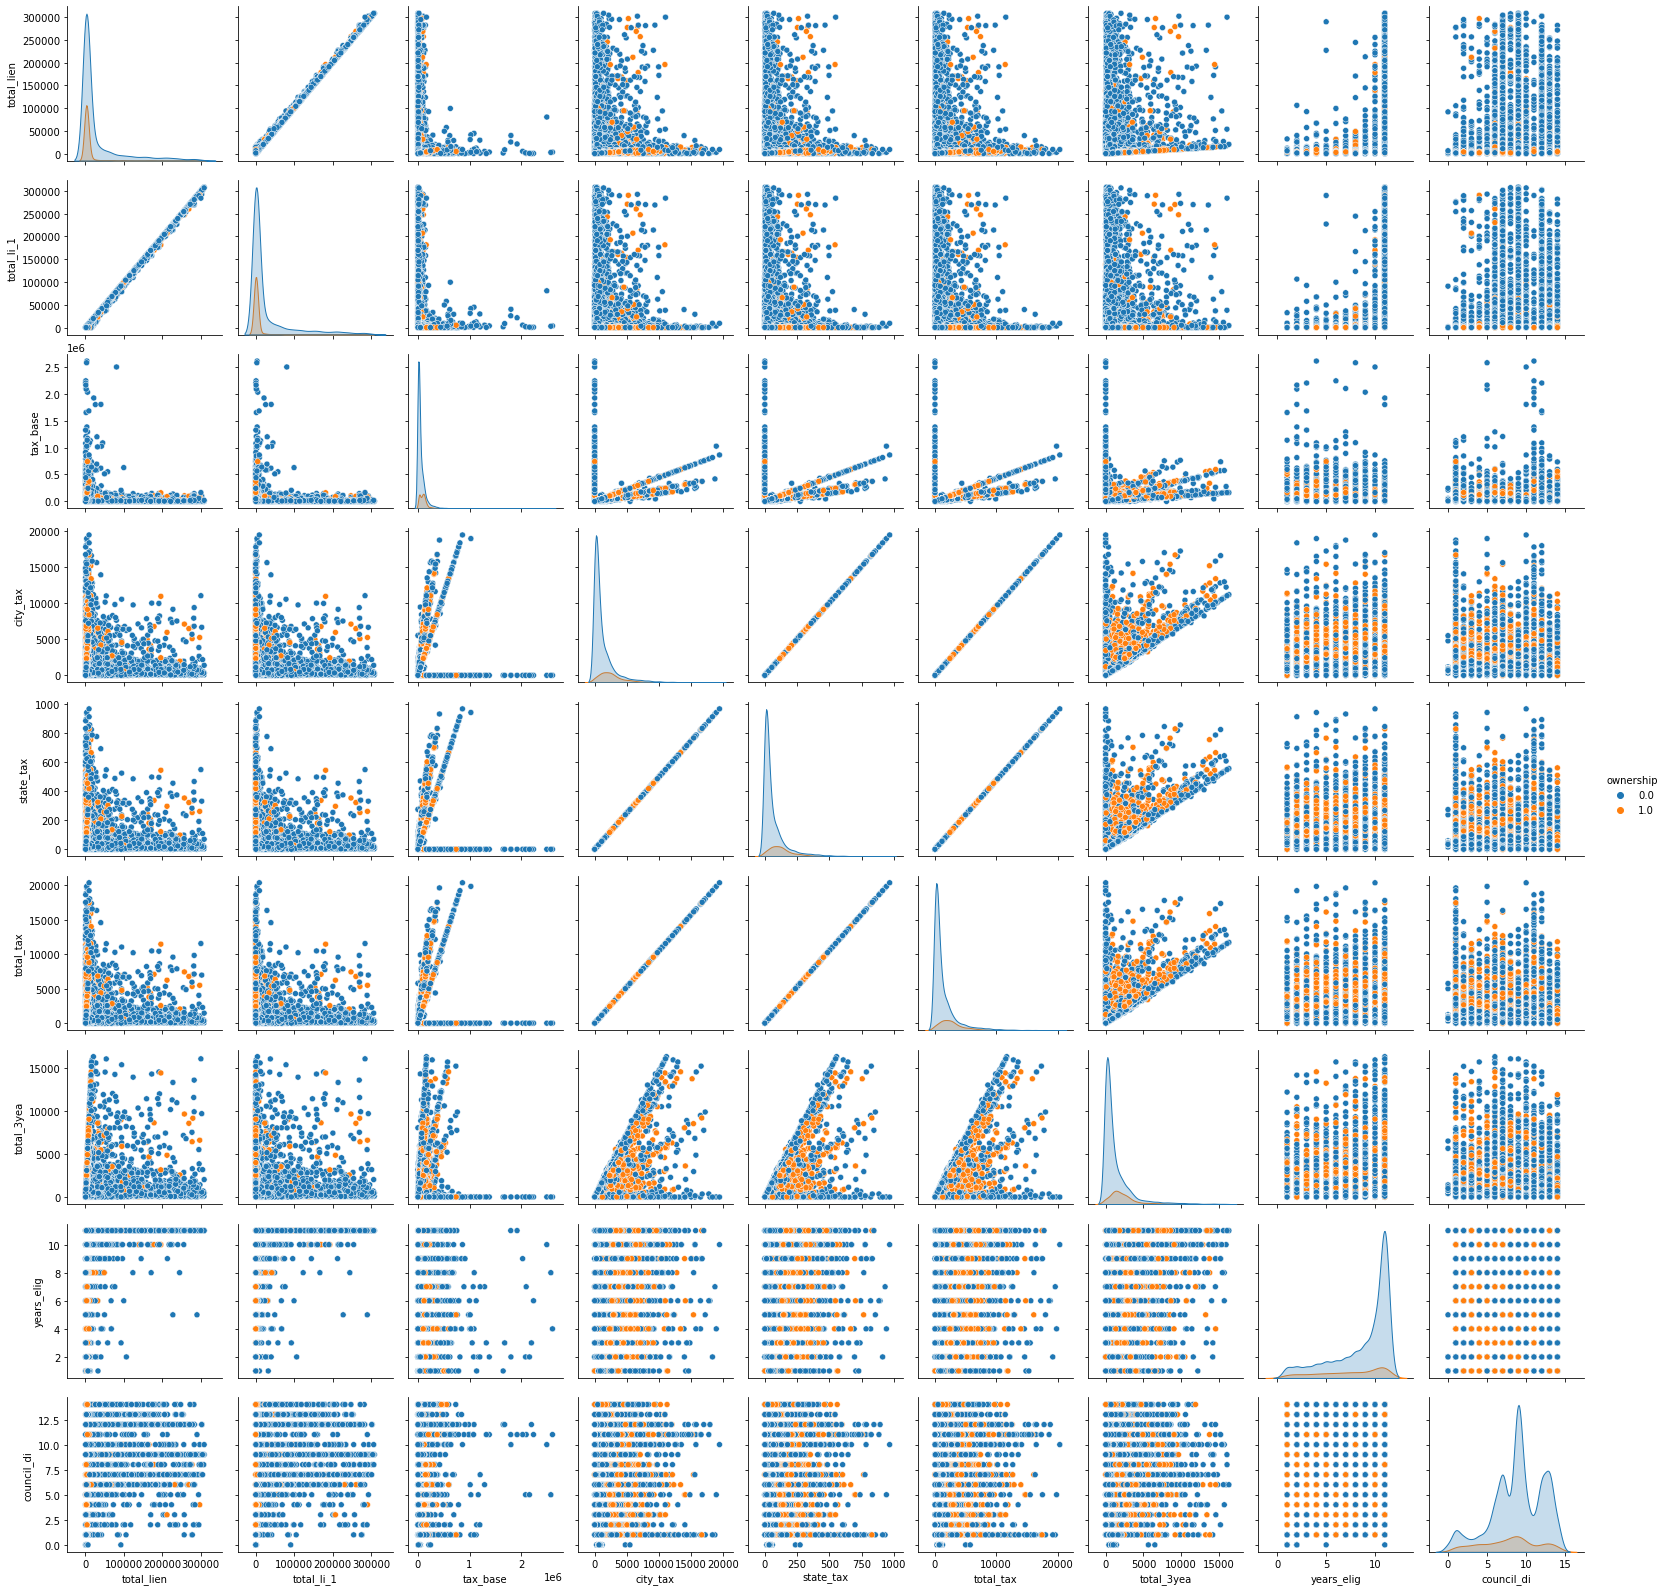

In [48]:
sns.pairplot(df2,hue='ownership')

In [49]:
#Changing the datatype of the ownership column 
df2['ownership']=df2['ownership'].astype('int')

##### Seperating features and targets into X and y respectively

In [50]:
#Seperating the columns as target and features
x = [x for x in df2.columns if x != 'ownership']
X=df2[x]
y= df2['ownership']

##### Creating categories into columns as part of one-hot encoding

In [51]:
X=pd.get_dummies(X,drop_first=True)

In [52]:
X.head()

,total_lien,total_li_1,tax_base,city_tax,state_tax,total_tax,total_3yea,years_elig,council_di,land_use_c_CC,land_use_c_E,land_use_c_EC,land_use_c_I,land_use_c_M,land_use_c_R,land_use_c_RC,land_use_c_U,when_sold_NOT SOLD IN 4 YEARS,when_sold_SOLD IN 4 YEARS,being_remo_WILL BE SOLD
0,1613.71,0.00,30000,1348.80,67.20,1416.00,1613.71,10,9,0,0,0,0,0,1,0,0,0,1,1
1,29687.35,28612.05,16200,1045.32,52.08,1097.40,1075.30,11,9,0,0,0,0,0,1,0,0,0,1,1
2,22180.70,22070.48,1000,67.44,3.36,70.80,110.22,11,9,0,0,0,0,0,1,0,0,0,1,1
3,88346.63,88236.41,1000,67.44,3.36,70.80,110.22,11,9,0,0,0,0,0,1,0,0,0,1,1
4,335.20,30.00,30000,555.26,27.66,582.92,305.20,3,9,0,0,0,0,0,1,0,0,0,0,1


##### Plotting coorelation to check coorelation among various features 

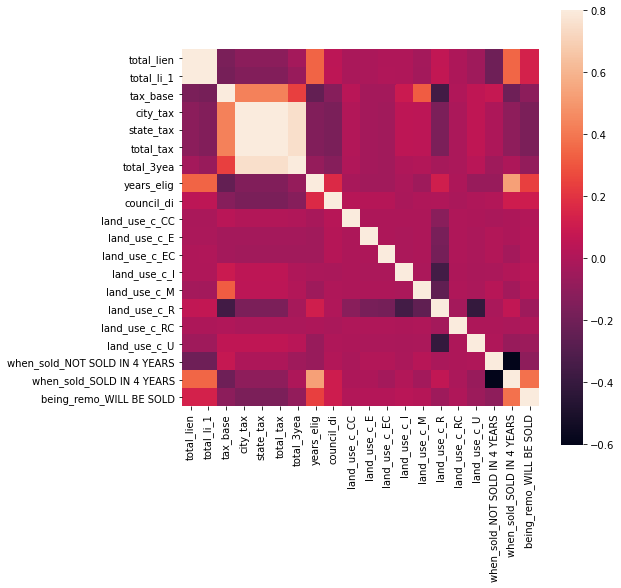

In [53]:
#visualization of correlation matrix
corrmat = X.corr()
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, vmax=.8, square=True);

##### Chi Square test to select the features having greater importance

In [54]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [55]:
X=X.astype(np.float64)

In [56]:
from sklearn.feature_selection import SelectKBest
chi2_test=SelectKBest(score_func=chi2, k=12)

In [57]:
chi2_model=chi2_test.fit(X,y)

In [58]:
#Printing the model scores
chi2_model.scores_

array([2.79369222e+07, 3.21098508e+07, 3.14664770e+07, 1.85978227e+06,
       9.26588768e+04, 1.95244115e+06, 9.95260053e+05, 3.47557929e+02,
       1.78488099e+02, 2.96157895e+00, 4.14300211e+00, 7.14263158e+00,
       2.59573684e+01, 1.37626316e+01, 8.76250196e+00, 1.74210526e-01,
       2.11546097e+01, 4.03019883e-01, 1.08935959e+02, 5.21163182e+02])

In [59]:
#defining a function to list a feature against score
def chi2_scores(X,score):
    features=pd.DataFrame()
    for i in range(X.shape[1]):
        new=pd.DataFrame({"Features":X.columns[i],"Score":score[i]},index=[i])
        features=pd.concat([features,new])
    return features

In [60]:
chi_df=chi2_scores(X,chi2_model.scores_)

In [61]:
chi_df=chi_df.sort_values(['Score'], ascending=[False])

In [62]:
chi_df=chi_df.reset_index()

In [63]:
chi_df

,index,Features,Score
0,1,total_li_1,3.210985e+07
1,2,tax_base,3.146648e+07
2,0,total_lien,2.793692e+07
3,5,total_tax,1.952441e+06
4,3,city_tax,1.859782e+06
5,6,total_3yea,9.952601e+05
6,4,state_tax,9.265888e+04
7,19,being_remo_WILL BE SOLD,5.211632e+02
8,7,years_elig,3.475579e+02
9,8,council_di,1.784881e+02


> Inferences:
    
    We can see that the scores of the respective features and taking 12 prime features into account and dropping the remaining features further

In [64]:
#Dropping the unimportant features
X.drop(['land_use_c_M','land_use_c_R','land_use_c_EC','land_use_c_E','when_sold_NOT SOLD IN 4 YEARS','land_use_c_RC'],axis=1,inplace=True)

##### Splitting the data into train & test data by using stratify parameter to handle class imbalance issue

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=50,stratify=y)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

Training samples: 7,808
Test samples: 3,347


##### Plotting the coorelation matrix with the imortant features for our analysis further

<AxesSubplot:>

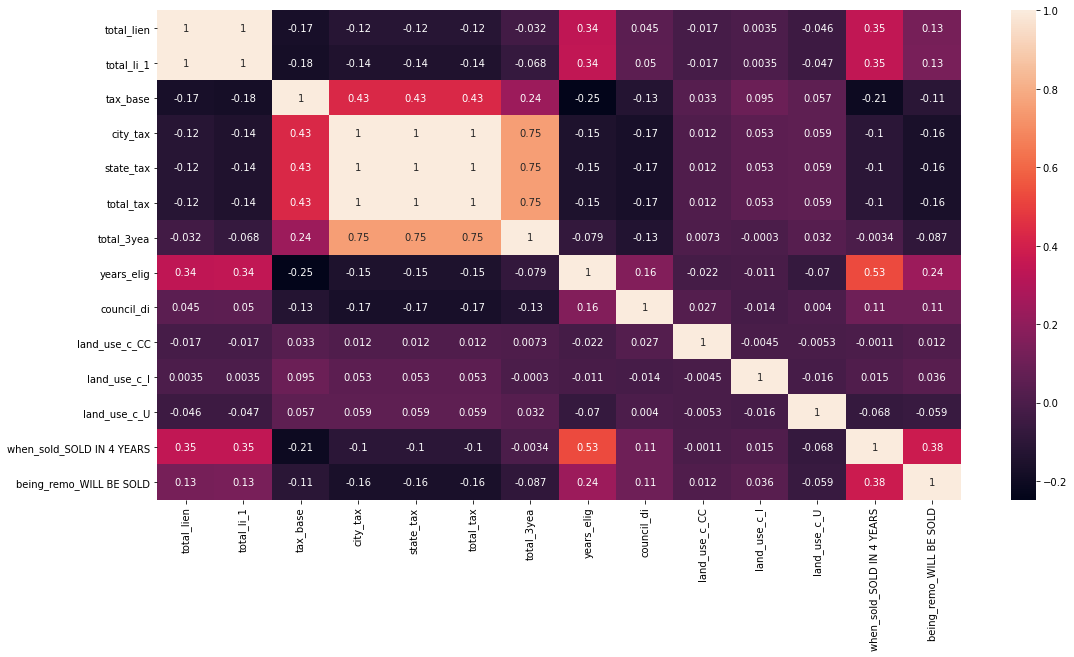

In [66]:
plt.figure(figsize=(18,9))
sns.heatmap(X.corr(),annot=True)

> Inferences:
    
    We can see that the columns such as city_tax and toal_tax are highly coorelated and the columns such as total_tax and council_Id has less coorelation

##### Creating the base pipeline with Standrad Scaler as our base pipeline

In [67]:
#Creating data pipeline with standard scaler imputer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

processing_pipeline = Pipeline([('impute_missing', SimpleImputer(missing_values=0,strategy='median')),('scaler', StandardScaler())])


In [68]:
processing_pipeline

Pipeline(steps=[('impute_missing',
                 SimpleImputer(missing_values=0, strategy='median')),
                ('scaler', StandardScaler())])

In [69]:
#importing the libraries required for logistic regression and evaluating the metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

##### Logistic Regression 

In [70]:
#creating the modelling pipeline from the data processing pipeline
modeling_pipeline = Pipeline([('data_processing', processing_pipeline),('lr', LogisticRegression(penalty='l2'))])
lr = modeling_pipeline.fit(X_train, y_train)

Inferences:
    
    Here, I've used Logistic Regression using l2 penalty

In [71]:
lr.classes_

array([0, 1])

>Inferences:
    
    Printing the classes in target variable. Here, we can confirm that the clasess are 0 and 1 

In [72]:
#calculating the accuracy score on test data
predictions=lr.predict(X_test)
print("Test score:",accuracy_score(predictions, y_test))

Test score: 0.8434418882581416


In [73]:
#calculating the accuracy score on train data
predictions_train = lr.predict(X_train)
print("Training Score:",accuracy_score(predictions_train, y_train))

Training Score: 0.8451588114754098


>Inferences:
    
    Here, the training accuracy and test data accuracy are close to each other, so there is no case of over-fitting or under-fitting

### Metric Choosed: ROC AUC SCORE

**ROC AUC SCORE is used primarily for slightly imbalaned datasets. As our target variable has some degree of imbalance, it's goos to use ROC AUC score as our evalutaion metric.**

**The ROC AUC score gives us a score to determine how well the model has predicted the instances correctly**

**Since, we are working on a real estate domain, it's important that our model predicts number of correct instances, in order to future develop on the model and use it in pratical applications. Hence, ROC AUC Score is the best metric to determine the predictive power of the model**



In [74]:
from sklearn.metrics import roc_auc_score
probabilities = lr.predict_proba(X_test)

In [75]:
print("ROC AUC Score:",roc_auc_score(y_test,probabilities[:,1]))

ROC AUC Score: 0.760626213420876


>Inferences:
    The ROC AUC score for the model is 76%. That means our model is able to predict 76% of the instances correctly

##### Printing the confusion matrix

In [76]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[2814,   36],
       [ 488,    9]], dtype=int64)

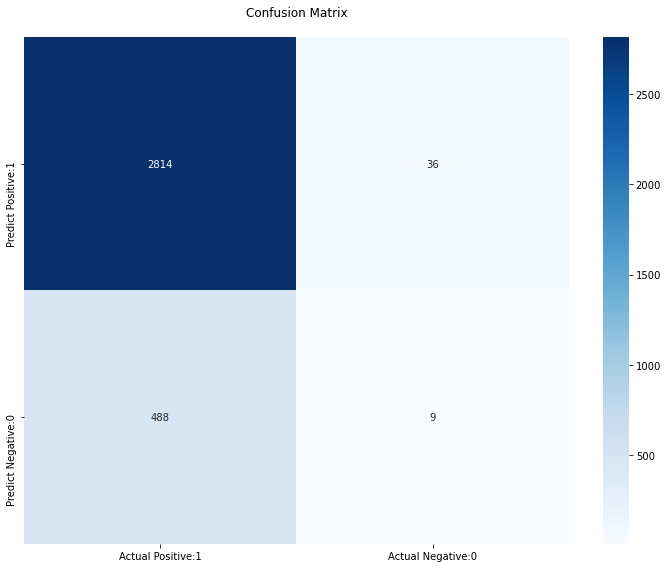

In [77]:

fig, ax = plt.subplots(figsize=(10,8))
cm_rf = confusion_matrix(y_test, predictions)
cm_matrix_rf = pd.DataFrame(data=cm_rf, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix\n")
plt.tight_layout()

In [78]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.99      0.85      0.91      3302
           1       0.02      0.20      0.03        45

    accuracy                           0.84      3347
   macro avg       0.50      0.53      0.47      3347
weighted avg       0.97      0.84      0.90      3347



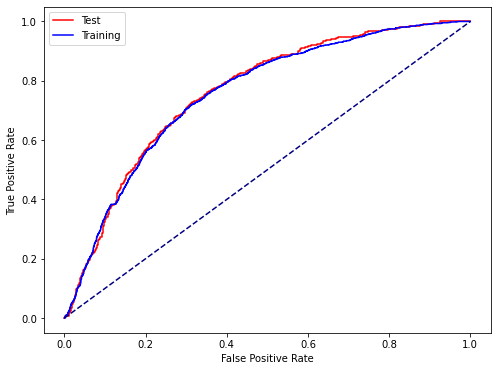

In [79]:
from sklearn.metrics import roc_curve

def generate_probs(X, model=lr):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs)
    return fpr, tpr
    
fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(X_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

>Inferences:
    
    The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate 
    the test.
    Here, the model is quiet good as the curve deviates from the diagonal.

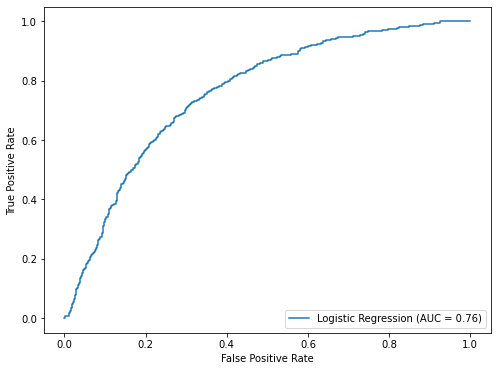

In [80]:
#Plotting the ROC_AUC_CURVE
from sklearn.metrics import roc_auc_score, plot_roc_curve
plot_roc_curve(lr, X_test,y_test,name='Logistic Regression')

>Inferences:
    
    ROC-AUC curve is an evaluation metric for binary classification problems that plots False positive rate against True positive rate. The Area Under the Curve (AUC) value determines the ability of the classifier to distinguish between the classes. Here, the AUC value is 76% that implies, the model is 76% accurate in distinguishing the classes.

##### Logistic Regression using 10 folds Grid Search Cross Validation at various regularization strengths and liblinear solver

**Metholoies to choose C hyper parameter:**
  
    Regularization is used to handle the problem of overfitting. If, the value of C is too large, it leads to over-fitting problem. And if the value of c is lower, results in under-fitting problem.
    
    So, it is best to have our model running at varios C values and find out the best regularization strength
    

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

p_lr = Pipeline([('processing', processing_pipeline),
             ('lr', LogisticRegression(penalty='l2',solver='liblinear'))])

params = {'lr__C': [0.01, 0.1, 1, 10,100]}

lr = GridSearchCV(p_lr, param_grid=params, cv=10, scoring='roc_auc', refit=True)
lr = lr.fit(X_train, y_train)
lr_p = lr.predict(X_test)

print(f'Validation score: {lr.best_score_:.2%}')
print(f'Test score: {lr.score(X_test, y_test):.2%}')

Validation score: 78.75%
Test score: 78.40%


>Inferences:
    
    Here, the Validation and test scores are comparable. Hence, there is no case for under-fitting or over-fitting

##### Printing ROC_AUC_SCORE

In [82]:
from sklearn.metrics import roc_auc_score
probabilities = lr.predict_proba(X_test)
print("ROC AUC Score:",roc_auc_score(y_test,probabilities[:,1]))

ROC AUC Score: 0.7840050831303611


> Inferences:
    
    Here, the roc_auc_score has improved to some extent using liblinear solver and the score is around 78% 

##### Generating the ROC_AUC_CURVE

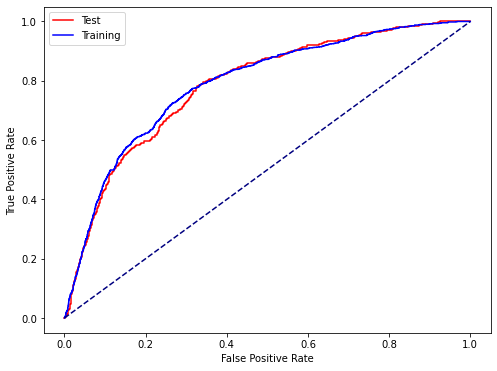

In [83]:
from sklearn.metrics import roc_curve

def generate_probs(X, model=lr):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs)
    return fpr, tpr
    
fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(X_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

>Inferences:
    
    The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate 
the test.
Here, the model is quiet good as the curve deviates from the diagonal.

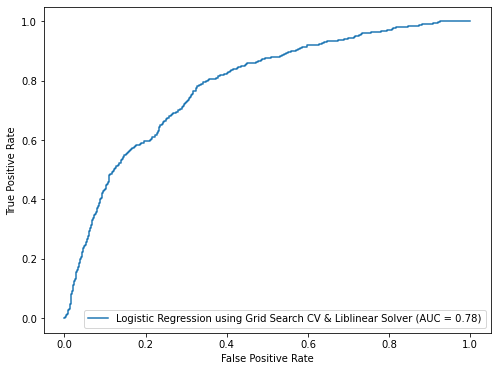

In [84]:
plot_roc_curve(lr, X_test,y_test, name='Logistic Regression using Grid Search CV & Liblinear Solver')

>Inferences:
    
    The Area Under the Curve (AUC) value determines the ability of the classifier to distinguish between the classes. Here, the AUC value is 78% that implies, the model is 78% accurate in distinguishing the classes.
    
    Hence, Liblinear solver has improved the performance of the model.

##### Identifying the best hyper parameter

In [85]:
lr.best_params_

{'lr__C': 100}

In [86]:
lr.best_score_

0.7875448478768134

>Inferences:
    
    The best ROC_AUC_CURVE score is 79% after running at various regularization strengths 
    using liblinear solver and at regularization strengt of 100.

##### Logistic Regression using 10 folds Grid Search Cross Validation at various regularization strengths and saga solver

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

p_lr = Pipeline([('processing', processing_pipeline),
             ('lr', LogisticRegression(solver='saga'))])

params = {'lr__C': [0.01, 0.1, 1, 10,100]}

lr = GridSearchCV(p_lr, param_grid=params, cv=10, scoring='roc_auc', refit=True)
lr = lr.fit(X_train, y_train)
lr_p = lr.predict(X_test)

print(f'Validation score: {lr.best_score_:.2%}')
print(f'Test score: {lr.score(X_test, y_test):.2%}')

Validation score: 74.93%
Test score: 75.70%


>Inferences:
    
    Here, the Validation and test scores are comparable. Hence, there is no case for under-fitting or over-fitting

##### Calculating the ROC_AUC_SCORE 

In [88]:
from sklearn.metrics import roc_auc_score, plot_roc_curve
probabilities = lr.predict_proba(X_test)
print("ROC AUC Score:",roc_auc_score(y_test,probabilities[:,1]))

ROC AUC Score: 0.7569705955028417


>Inferences:
    
    Here, the roc_auc_score has not improved using saga solver and the score is around 76% 

##### Plotting the ROC_AUC_CURVE

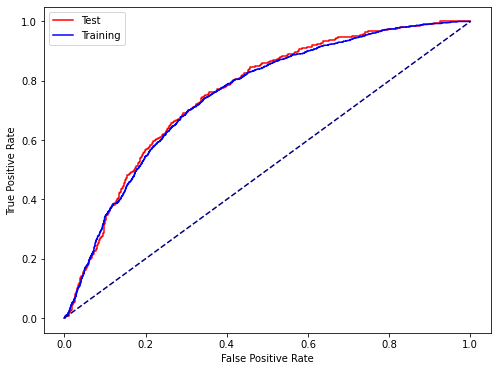

In [89]:
from sklearn.metrics import roc_curve

def generate_probs(X, model=lr):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs)
    return fpr, tpr
    
fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(X_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

>Inferences:
    
    The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate 
the test. Here, the model is quiet good as the curve deviates from the diagonal.

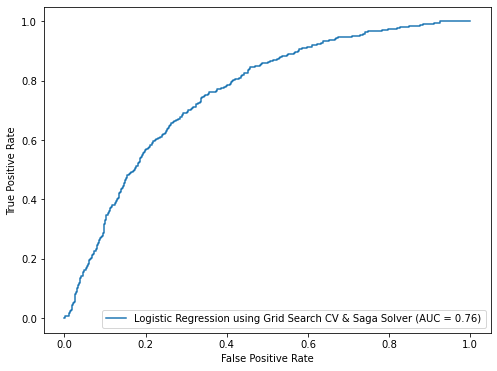

In [90]:
plot_roc_curve(lr, X_test,y_test, name='Logistic Regression using Grid Search CV & Saga Solver')

>Inferences:
    
    The Area Under the Curve (AUC) value determines the ability of the classifier to distinguish between the classes. Here, the AUC value is 76% that implies, the model is 76% accurate in distinguishing the classes.

Hence, Saga solver has not improved the performance of the model. Liblinear solver has achieved the better results.

In [91]:
lr.best_params_

{'lr__C': 100}

In [92]:
lr.best_score_

0.7492534296761394

>Inferences:
    
    The best ROC_AUC_CURVE score is 75% after running at various regularization strengths using 
    Saga Solver and at regularization strength of 100.

***Prediction uisng Decision Tree***

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

p_dt = Pipeline([('processing', processing_pipeline),('dt', DecisionTreeClassifier())])
params = {'dt__max_depth': [1, 5, 10, 15, 25, 50, 100],'dt__min_samples_split': [3, 10, 15]}

dt = GridSearchCV(p_dt, param_grid=params, cv=10, scoring='roc_auc', refit=True)
dt = dt.fit(X_train, y_train)
dt_p = dt.predict(X_test)

print(f'Validation score: {dt.best_score_:.2%}')
print(f'accuracy score: {accuracy_score(dt_p, y_test):.2%}')

Validation score: 86.10%
accuracy score: 88.41%


In [94]:
probabilities = dt.predict_proba(X_test)
print("ROC AUC Score:",roc_auc_score(y_test,probabilities[:,1]))

ROC AUC Score: 0.8629856330968266


>Inferences:
The score is 86%, which is more than that of the logistic regression at various regularization strengths. We could infer that prediction using decision trees has improved the performance of the mode.

In [95]:
dt.best_params_

{'dt__max_depth': 10, 'dt__min_samples_split': 15}

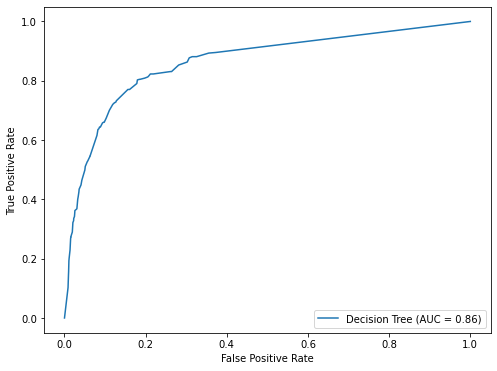

In [96]:
plot_roc_curve(dt, X_test,y_test, name='Decision Tree')

>Inferences:
The best ROC_AUC_CURVE score is 86% after running at 10 depths and 15 splits of decision tree algorithm.

***Prediction using SVM grid search***

In [97]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
p_svm= Pipeline([('processing', processing_pipeline),('clf', SVC(probability=True))])
param_grid = {'clf__C': [0.1, 1, 10, 100, 1000],'clf__gamma': [1, 0.1, 0.01, 0.001, 0.0001],'clf__kernel': ['rbf']}
 
svm = GridSearchCV(p_svm, param_grid, refit = True, verbose = 3,n_jobs=-1)
 


In [98]:
# fitting the model 
svm.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed: 12.9min finished


GridSearchCV(estimator=Pipeline(steps=[('processing',
                                        Pipeline(steps=[('impute_missing',
                                                         SimpleImputer(missing_values=0,
                                                                       strategy='median')),
                                                        ('scaler',
                                                         StandardScaler())])),
                                       ('clf', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'clf__C': [0.1, 1, 10, 100, 1000],
                         'clf__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'clf__kernel': ['rbf']},
             verbose=3)

In [99]:
probabilities = svm.predict_proba(X_test)
print("ROC AUC Score for SVM:",roc_auc_score(y_test,probabilities[:,1]))

ROC AUC Score for SVM: 0.8715577676585831


In [100]:
svm.best_params_

{'clf__C': 1000, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'}

>Inferences:
    
    With the low value of C, the model gets so generalized. Gamma parameter controls the distance of the influence of a single training data point. Models with higher values of Gamma tend to overfit. 
    
    With using the RBF kernel, both C and gamma values need to be optimized simultaneously. If the value of gamma is large, the effect of C becomes negligible and vice-versa. 
    
    Thus, our model performs better at C=1000 and Gamma = 0.1
    
    Choosing larger values of C results in choosing a smaller margin hyperplane. The decision function is better at classifying all data points correctly.

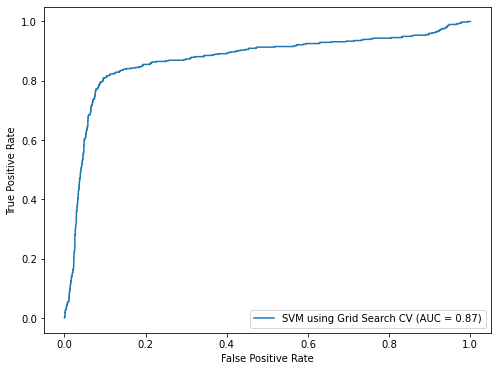

In [101]:
plot_roc_curve(svm, X_test,y_test, name='SVM using Grid Search CV')

>Inferences:
    
    The ROC AUC SCORE for grid search using SVM classifier is around 87%, which is better than all the algorithms discussed above. With this, we can infer that the SVM using grid search has improved the performance of the model.

***Prediction using K-Nearest Neighbours algorithm***

In [102]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

knn_m= Pipeline([('processing', processing_pipeline),('model', KNeighborsClassifier())])

param_grid = [
  {'model__n_neighbors': [1, 4, 8, 10, 15], 'model__weights': ['uniform','distance']}
 ]

knn_results = GridSearchCV(estimator=knn_m, param_grid=param_grid, scoring='roc_auc', refit=True, cv=5)
knn_results = knn_results.fit(X_train, y_train)

In [103]:
probabilities = knn_results.predict_proba(X_test)
print("ROC AUC Score for KNN:",roc_auc_score(y_test,probabilities[:,1]))

ROC AUC Score for KNN: 0.8288958311271136


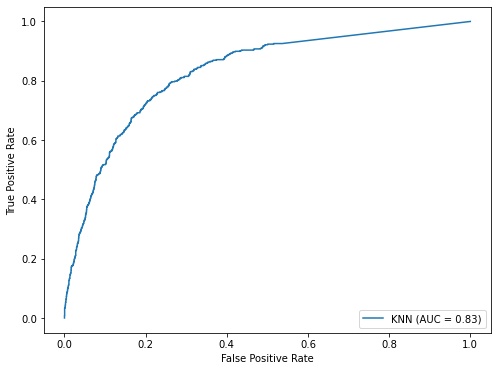

In [104]:
#Plotting the ROC_AUC_Curve for KNN
plot_roc_curve(knn_results, X_test,y_test, name='KNN')

>Inferences:

The ROC_AUC scores for KNN alorithm is around 83%, which is lower than that of decision tree and support vector machine

**Explorative Data Analysis Outcomes:**

1) We can see that the total_tax values are between 1000 and 20000.

2) We can see that most of the properties have deed dates in June.

3) Most of the deeds happened in the year 2019.

4) Most of the properties are eligible for 11 years of taxation

5) The properties in council id 9 is paying the highest total taxes

6) The properties with 2 years of taxation are paying the highest taxes as compared to the other years

7) The properties with the "D" ownership indicator is paying the highest taxes

8) The properties with land use CC as the indicator has paid the highest total taxes and the properties with an indicator "I" has paid the next highest total taxes

9) It can be inferred that the properties that have labeled as sold in 4 years have paid the highest total tax with properties of 'D' indicator

**Outcomes:**

1) The logistic regression with l2 penalty has obtained a ROC_AUC score of 76%. 

2) The Logistic Regression with l2 penalty and liblinear solver has obtained a greater ROC_AUC score of 78% at 100 as the coefficient of regularization strength.

3) The Logistic Regression with l2 penalty and saga solver has obtained a ROC_AUC score of 76%, which is lower than liblinear solver.

4) Logistic regression with a liblinear solver at various regularization strengths has improved the performance of the model.

5) Decision trees classification model has improved the model, with a score of 86%. 

6) Support Vector Machine using grid search has also improved the model with the score of 87% with the hyper-parameters of C=1000 and Gamma =0.1. 

7) KNN algorithm has ROC_AUC score around 83%

8) We can infer that the SVM using grid search and decision trees classification model has improved the model.

9) Z-Scores are determined to remove the outliers. A Z-Score value greater than 3 is used to eliminate the outliers.

10) Chi-Square test is used to determine the most independent features and they are used for further modeling.

11) Total_tax, State_tax, city_tax, being_remo_WILL BE SOLD, years_eligible are the most important features of the model.

12) As we obtained a score of 87%, we must also consider other features as well for effective modeling.

**Further Developments:**
    
Enough number of training instances for all kinds of ownership indicators and the rich availability of training data lead to the development of a better model with improved scores. Model performance score could be improved by using neural network techniques. Rather than the statistical methods of determining the important features, business domain knowledge plays a key role in determining the useful features. Outliers treatment is also confined to the kind of business problem we are solving. 

Further, Neural networks and ensembling learning can improve the performance of the model.

References:
    
1) https://stackoverflow.com/questions/21397549/stack-bar-plot-in-matplotlib-and-add-label-to-each-section
    
2) https://www.youtube.com/watch?v=81JSbXZ26Ls&list=PLZoTAELRMXVPgjwJ8VyRoqmfNs2CJwhVH&index=3&ab_channel=KrishNaik

3) https://www.youtube.com/watch?v=p_tpQSY1aTs&ab_channel=KrishNaik   